<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/5week_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder 예제

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255

#정규화
X_test = X_test.astype(np.float32) / 255
# valid data는 5000개만 사용
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:] 
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
                                             keras.layers.Flatten(input_shape = [28, 28]),
                                             keras.layers.GaussianNoise(0.2),
                                             keras.layers.Dense(100, activation = 'relu'),
                                             keras.layers.Dense(30, activation = 'relu')
])

denoising_decoder = keras.models.Sequential([
                                             keras.layers.Dense(100, activation = 'relu', input_shape = [30]),
                                             keras.layers.Dense(28*28, activation = 'sigmoid'),
                                             keras.layers.Reshape([28, 28])
])

denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 1.0))
history = denoising_ae.fit(X_train, X_train, epochs = 8,
                           validation_data = (X_valid, X_valid))

Epoch 1/8
1719/1719 [==============================] - 10s 4ms/step - loss: 0.3764 - val_loss: 0.3379
Epoch 2/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3198 - val_loss: 0.3213
Epoch 3/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3117 - val_loss: 0.3108
Epoch 4/8
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3065 - val_loss: 0.3029
Epoch 5/8
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3028 - val_loss: 0.2997
Epoch 6/8
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3000 - val_loss: 0.2993
Epoch 7/8
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2977 - val_loss: 0.2953
Epoch 8/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2960 - val_loss: 0.2943


In [6]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = denoising_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


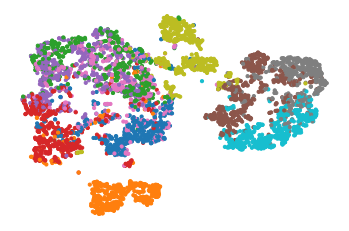

In [7]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c = y_valid, s = 10, cmap = 'tab10')
plt.axis('off')
plt.show()

# AutoEncoder 실습

In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [10]:
# Autoencoder 구성 - (1) 기본 AE모델
encoding_dim = 32

input_img = Input(shape = (784, ))
encoded = Dense(encoding_dim, activation = 'relu')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)

# autoencoder
autoencoder = Model(input_img, decoded)

In [11]:
# Encoder, Decoder 각각 모델 구현
encoder = Model(input_img, encoded)
encoded_input = Input(shape = (encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [14]:
# 정규화 및 학습
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))

print(x_train_flatten.shape)
print(x_test_flatten.shape)

(60000, 784)
(10000, 784)


In [15]:
autoencoder.fit(x_train_flatten, x_train_flatten,
                batch_size = 256, epochs = 50,
                validation_data = (x_test_flatten, x_test_flatten))

Epoch 1/50
235/235 [==============================] - 4s 10ms/step - loss: 0.2776 - val_loss: 0.1927
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1714 - val_loss: 0.1528
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1436 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1274 - val_loss: 0.1200
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1167 - val_loss: 0.1114
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1095 - val_loss: 0.1055
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1045 - val_loss: 0.1013
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1011 - val_loss: 0.0986
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0988 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0972 - val_loss: 0.095

In [16]:
encoded_imgs = encoder.predict(x_test_flatten)
decoded_imgs = decoder.predict(encoded_imgs)
valid_imgs = autoencoder.predict(x_test_flatten)

원본 data


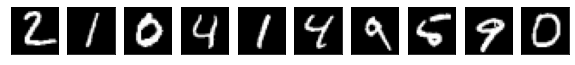

In [17]:
n = 10
plt.figure(figsize = (10, 4))
print("원본 data")
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

AE를 통해 재구성된 data


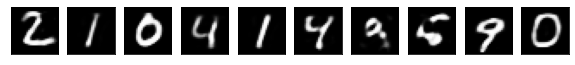

In [18]:
plt.figure(figsize = (10, 4))
print("AE를 통해 재구성된 data")
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
# Autoencoder 구성 - Deep AE
input_img = Input(shape = (784, ))
encoded = Dense(128, activation = 'relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)

decoded = Dense(64, activation = 'relu')(encoded)
decoded = Dense(128, activation = 'relu')(decoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

In [20]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

autoencoder.fit(x_train_flatten, x_train_flatten,
                batch_size = 256, epochs = 100,
                validation_data = (x_test_flatten, x_test_flatten))

Epoch 1/100
235/235 [==============================] - 4s 11ms/step - loss: 0.2466 - val_loss: 0.1689
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1512 - val_loss: 0.1373
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1318 - val_loss: 0.1253
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1224 - val_loss: 0.1176
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1160 - val_loss: 0.1123
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1117 - val_loss: 0.1086
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1087 - val_loss: 0.1064
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1065 - val_loss: 0.1048
Epoch 9/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1046 - val_loss: 0.1025
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.102

In [21]:
valid_imgs = autoencoder.predict(x_test_flatten)

원본 data


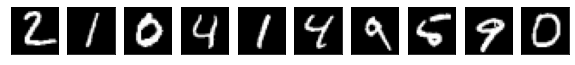

In [22]:
n = 10
plt.figure(figsize = (10, 4))
print("원본 data")
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep AE를 통해 재구성된 data


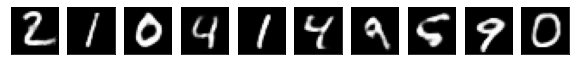

In [23]:
plt.figure(figsize = (10, 4))
print("Deep AE를 통해 재구성된 data")
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(valid_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

기존 AE보다 좀 더 선명함.